In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math
import numpy as np
import random
from Cell2D import Cell2D

In [2]:
# method to read data from excel file
def read_plane_data(file_name):
    df_planes = pd.read_excel(file_name)
    return df_planes

df = read_plane_data('airplanedata.xlsx')

print('Here are your plane choices:')
print(df['aircraft_type'])

Here are your plane choices:
0                A220-300
1      Bombardier CRJ-900
2        Beechcraft 1900D
3    Boeing 737-300 (733)
Name: aircraft_type, dtype: object


In [3]:
plane_choice = input("Input the number corresponding to the plane you'd like to simulate:")    

Input the number corresponding to the plane you'd like to simulate: 2


In [4]:
plane_type = df.loc[int(plane_choice)].at['aircraft_type']
print('You selected:', plane_type)

You selected: Beechcraft 1900D


In [5]:
def seat_params_info(df, plane_num):
    """Function to gather information from table regarding seat dimensions and return a list of tuples."""
    seat_width_economy = df.loc[int(plane_num)].at['seat width - economy']
    seat_depth_economy = df.loc[int(plane_num)].at['seat depth - economy']
    seat_param_economy = seat_width_economy, seat_depth_economy

    seat_width_business = df.loc[int(plane_num)].at['seat width - business']
    seat_depth_business = df.loc[int(plane_num)].at['seat depth - business']
    seat_param_business = seat_width_business, seat_depth_business

    seat_width_1stclass = df.loc[int(plane_num)].at['seat width - first class']
    seat_depth_1stclass = df.loc[int(plane_num)].at['seat depth - first class']
    seat_param_1stclass = seat_width_1stclass, seat_depth_1stclass

    seat_params = [seat_param_economy, seat_param_business, seat_param_1stclass]

    return seat_params

seat_params_info(df, plane_choice)

[(20.2, 30), (nan, nan), (nan, nan)]

In [6]:
def num_of_seats_info(df, plane_num):
    """Function to gather information from table regarding number of seats and return a tuple."""
    econ = df.at[int(plane_num), "total seats - economy"]
    bus = df.at[int(plane_num), "total seats - business"]
    first = df.at[int(plane_num), "total seats - first class"]
    
    num_of_seats = econ, bus, first

    return num_of_seats

num_of_seats_info(df, plane_choice)

(18, 0, 0)

In [7]:
def seat_arrange_info(df, plane_num):
    """Function to gather information from table regarding seat arrangement and return a list."""
    seat_arrange_econ = df.loc[int(plane_num)].at['seat arrangement - economy']

    seat_arrange_bus = df.loc[int(plane_num)].at['seat arrangement - business']
    
    seat_arrange_1st = df.loc[int(plane_num)].at['seat arrangement - first class']
    
    seat_arrange = [seat_arrange_econ, seat_arrange_bus, seat_arrange_1st]

    return seat_arrange

seat_arrange_info(df, plane_choice)

['1 1', nan, nan]

In [8]:
class Plane(Cell2D):
    def __init__(self, seat_params, num_of_seats, seat_arrange):
        self.seat_param_economy = seat_params[0]
        self.seat_param_business = seat_params[1]
        self.seat_param_firstclass = seat_params[2]

        self.num_of_seats_economy = num_of_seats[0]
        self.num_of_seats_business = num_of_seats[1]
        self.num_of_seats_firstclass = num_of_seats[2]

        self.seat_arrange_economy = seat_arrange[0]
        self.seat_arrange_business = seat_arrange[1]
        self.seat_arrange_firstclass = seat_arrange[2]

        self.total_seats = self.num_of_seats_firstclass + self.num_of_seats_business + self.num_of_seats_economy

    def draw_sect_of_plane(self, ax, seat_type, start_y, aisle_gap=5, padding = 1):
        seats_per_col = seat_type[0]
        seats_per_row = seat_type[1]
        num_rows = seat_type[2]
        seat_width = seat_type[3]
        seat_depth = seat_type[4]
        
        y = start_y
        
        for row in range(num_rows):
            x = 0
            y += seat_depth + padding
            
            for seat in range(seats_per_col[0]):
                rect = patches.Rectangle((x, y), seat_width, seat_depth, edgecolor='black', facecolor='grey')
                ax.add_patch(rect)

                x += seat_width + padding

            #make aisle
            x += aisle_gap

            for seat in range(seats_per_col[2]):
                rect = patches.Rectangle((x, y), seat_width, seat_depth, edgecolor='black', facecolor='grey')
                ax.add_patch(rect)

                x += seat_width + padding

    def draw_plane_find_parameters(self, seat_dims, seat_arrangement, num_of_seats):
        seats_per_col = seat_arrangement.split(' ')
            
        for i, num in enumerate(seats_per_col):
            seats_per_col[i] = int(num)

        dummy_var = seats_per_col[len(seats_per_col)//2]
        seats_per_col[len(seats_per_col)//2] = 0
        seats_per_col.append(dummy_var)
        
        seats_in_row = sum(seats_per_col)
        num_of_rows = math.ceil(num_of_seats/seats_in_row)

        seat_width = seat_dims[0] * 0.2
        seat_depth = seat_dims[1] * 0.2

        return seats_per_col, seats_in_row, num_of_rows, seat_width, seat_depth
    
    def draw_plane(self):
        fig, ax = plt.subplots(figsize=(10, 6))
        current_y = 0
        spacing = 1
        
        # first class seats        
        if self.num_of_seats_firstclass != 0:
            first_class = self.draw_plane_find_parameters(self.seat_param_firstclass, self.seat_arrange_firstclass, self.num_of_seats_firstclass)
            self.draw_sect_of_plane(ax, first_class, current_y, 10, 3)
            current_y += first_class[2] * (first_class[4] + spacing) + 1

            
        # business seats
        if self.num_of_seats_business != 0:
            business_class = self.draw_plane_find_parameters(self.seat_param_business, self.seat_arrange_business, self.num_of_seats_business)
            self.draw_sect_of_plane(ax, business_class, current_y, 5, 2)
            current_y += business_class[2] * (business_class[4] + spacing) + 10
            
        # economy seats
        economy_class = self.draw_plane_find_parameters(self.seat_param_economy, self.seat_arrange_economy, self.num_of_seats_economy)
        
        self.draw_sect_of_plane(ax, economy_class, current_y)
        current_y += economy_class[2] * (economy_class[4] + spacing) + 1 

        plt.axis('equal')
        plt.axis('off')
        plt.show()

    def get_section_ranges(self):
        """
        New method: Computes seat number ranges for each section (assuming contiguous numbering):
        - First class: seats 1 to num_of_seats_firstclass
        - Business: next seats
        - Economy: remaining seats
        """
        first_range = range(1, self.num_of_seats_firstclass + 1)
        business_start = self.num_of_seats_firstclass + 1
        business_end = business_start + self.num_of_seats_business - 1
        business_range = range(business_start, business_end + 1)
        economy_start = business_end + 1
        economy_end = self.total_seats
        economy_range = range(economy_start, economy_end + 1)
        return {'first': first_range, 'business': business_range, 'economy': economy_range}

In [9]:
# Helper function to declare plane object for passenger reference
plane = Plane(seat_params_info(df, plane_choice),
              num_of_seats_info(df, plane_choice),
              seat_arrange_info(df, plane_choice))
print("Plane instantiated with total seats:", plane.total_seats)

Plane instantiated with total seats: 18


In [10]:
# Helper function to determine the section of a given seat
def get_section(seat, section_ranges):
    for section, rng in section_ranges.items():
        if seat in rng:
            return section
    return None

In [11]:
# Define a Passenger agent class with additional attributes
class Passenger:
    def __init__(self, seat_number, age, walking_speed, luggage, loading_speed, 
                 is_child=False, parent_seat=None, parent=False, num_children=0, late=False):
        self.seat_number = seat_number
        self.age = age
        self.walking_speed = walking_speed
        self.luggage = luggage
        self.loading_speed = loading_speed
        # Calculate loading time; avoid division by zero
        self.loading_time = luggage / loading_speed if loading_speed != 0 else float('inf')
        self.is_child = is_child      # True if this passenger is a child
        self.parent = parent          # True if this passenger is a parent (non-child)
        self.num_children = num_children  # Number of children if parent is True
        self.parent_seat = parent_seat    # For child passengers, record parent's seat
        self.late = late              # True if the passenger is late to boarding

    def __repr__(self):
        base = (f"Passenger(seat={self.seat_number}, age={self.age}, walking_speed={self.walking_speed}, "
                f"luggage={self.luggage}, loading_speed={self.loading_speed}, loading_time={self.loading_time:.2f}")
        extras = []
        if self.parent:
            extras.append(f"parent=True, num_children={self.num_children}")
        if self.is_child:
            extras.append(f"child of seat {self.parent_seat}")
        if self.late:
            extras.append("late=True")
        extra_str = ", ".join(extras)
        if extra_str:
            base += ", " + extra_str
        base += ")"
        return base

In [12]:
# Functions for generating walking speed, loading speed, and age
def generate_walking_speed(age, is_child=False):
    speeds = list(range(1, 11))
    if is_child:
        if age <= 8:
            weights = [11 - s for s in speeds]  # Favor lower speeds
        else:
            weights = speeds  # Favor higher speeds
    else:
        if age < 55:
            weights = speeds  # Favor higher speeds
        else:
            weights = [11 - s for s in speeds]  # Favor lower speeds
    return random.choices(speeds, weights=weights, k=1)[0]

def generate_loading_speed(age, is_child=False):
    speeds = list(range(1, 11))
    if is_child:
        if age <= 8:
            weights = [11 - s for s in speeds]  # Favor lower loading speeds
        else:
            weights = speeds  # Favor higher loading speeds
    else:
        if age < 55:
            weights = speeds  # Favor higher loading speeds
        else:
            weights = [11 - s for s in speeds]  # Favor lower loading speeds
    return random.choices(speeds, weights=weights, k=1)[0]

def generate_age():
    # Generate age for adult passengers based on desired percentages
    categories = [
        ("18-54", 70, (18, 54)),
        ("55-69", 20, (55, 69)),
        ("70-84", 5, (70, 84)),
        ("85-99", 5, (85, 99))
    ]
    total_weight = sum(weight for (_, weight, _) in categories)
    r = random.uniform(0, total_weight)
    upto = 0
    for label, weight, (low, high) in categories:
        if upto + weight >= r:
            return random.randint(low, high)
        upto += weight
    return random.randint(18, 99)

In [13]:
def get_closest_seat(target, available):
    if not available:
        return None
    return min(available, key=lambda x: abs(x - target))

In [14]:
# Initialize passenger agents using the plane's total seat count and section ranges
total_seats = plane.total_seats

available_seats = list(range(1, total_seats + 1))
passengers = []

In [15]:
# Retrieve section ranges from the plane (first, business, economy)
section_ranges = plane.get_section_ranges()

while available_seats:
    # Generate an adult passenger from a random available seat
    seat = random.choice(available_seats)
    available_seats.remove(seat)
    age = generate_age()
    ws = generate_walking_speed(age, is_child=False)
    ls = generate_loading_speed(age, is_child=False)
    luggage = random.randint(0, 5)
    late = (random.random() < 0.05)  # 5% chance of being late
    is_parent = (random.random() < 0.15)  # 15% chance to be a parent
    num_children = 1 if is_parent else 0
    section = get_section(seat, section_ranges)
    passenger = Passenger(seat, age, ws, luggage, ls, section,
                          is_child=False, parent=False, num_children=num_children, late=late)
    passengers.append(passenger)
    
    # If the passenger is a parent, generate one child agent near the parent's seat.
    if is_parent:
        children_late = late  # Inherit parent's lateness
        child_seat = get_closest_seat(passenger.seat_number, available_seats)
        if child_seat is not None:
            available_seats.remove(child_seat)
            child_age = random.randint(0, 17)
            child_ws = generate_walking_speed(child_age, is_child=True)
            child_ls = generate_loading_speed(child_age, is_child=True)
            child_luggage = random.randint(0, 5)
            child_section = get_section(child_seat, section_ranges)
            child_passenger = Passenger(child_seat, child_age, child_ws, child_luggage, child_ls, child_section,
                                          is_child=True, parent_seat=passenger.seat_number, parent=False, num_children=0, late=children_late)
            passengers.append(child_passenger)

TypeError: Passenger.__init__() got multiple values for argument 'is_child'

In [ ]:
# Print Generated Agents - can be deleted later
print("\nGenerated Agents:")
for p in sorted(passengers, key=lambda x: x.seat_number):
    late_str = "late: True" if p.late else "late: False"
    if p.is_child:
        print(f"Seat {p.seat_number} - section: {p.section}, age: {p.age}, walking_speed: {p.walking_speed}, "
              f"luggage: {p.luggage}, loading_speed: {p.loading_speed}, loading_time: {p.loading_time:.2f}, {late_str} "
              f"(Child of Seat {p.parent_seat})")
    else:
        print(f"Seat {p.seat_number} - section: {p.section}, age: {p.age}, walking_speed: {p.walking_speed}, "
              f"luggage: {p.luggage}, loading_speed: {p.loading_speed}, loading_time: {p.loading_time:.2f}, {late_str}")

In [ ]:
# Age Distribution Anaylsis - can be deleted later
age_categories = {
    "0-17": (0, 17),
    "18-54": (18, 54),
    "55-69": (55, 69),
    "70-84": (70, 84),
    "85-99": (85, 99)
}

age_counts = {category: 0 for category in age_categories}
total_passengers = len(passengers)

for p in passengers:
    for category, (low, high) in age_categories.items():
        if low <= p.age <= high:
            age_counts[category] += 1
            break

print("Percentage of all passengers in each age category:")
for category, count in age_counts.items():
    percentage = (count / total_passengers) * 100 if total_passengers > 0 else 0
    print(f"{category}: {percentage:.2f}%")

late_seats = [p.seat_number for p in passengers if p.late]
print("\nSeats with late passengers:")
print(late_seats)

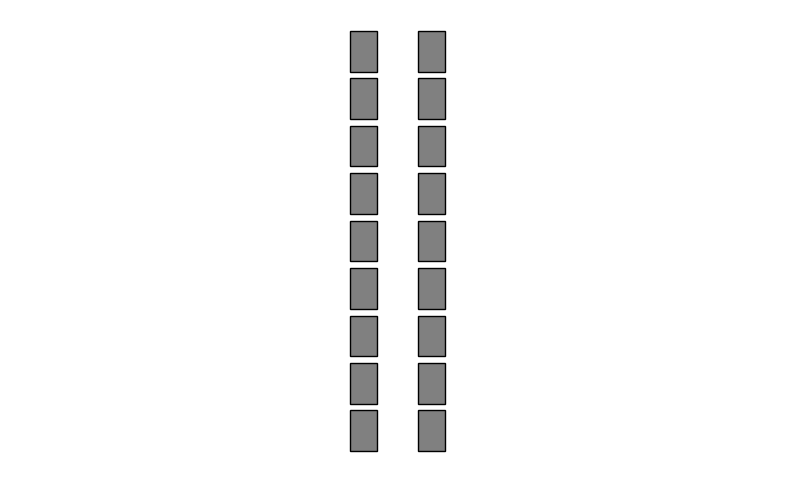

In [9]:
plane = Plane(seat_params_info(df, plane_choice), num_of_seats_info(df, plane_choice), seat_arrange_info(df, plane_choice))

plane.draw_plane()

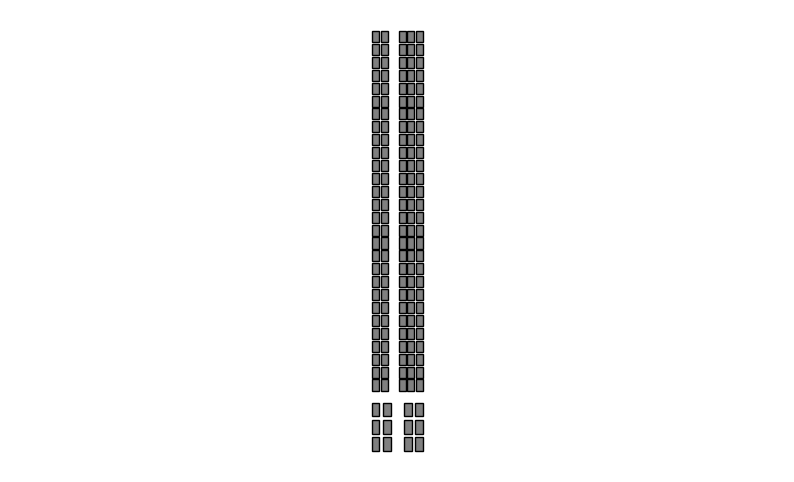

In [10]:
plane = Plane(seat_params_info(df, 0), num_of_seats_info(df, 0), seat_arrange_info(df, 0))

plane.draw_plane()